## Problem set 1, Intro to NLP, 2017

#### This is due on September 22nd at 11PM. Please see detailed submission instructions below.  100 points total.

##### How to do this problem set:

- What version of Python should I use? 2.7

- Most of these questions require writing Python code and computing results, and the rest of them have textual answers. To generate the answers, you will have to fill out a supporting file, `hw_1.py`.

- For all of the textual answers you have to fill out have placeholder text which says "Answer in one or two sentences here." For each question, you need to replace "Answer in one or two sentences here" with your answer.

- Write all the answers in this ipython notebook. Once you are finished (1) Generate a PDF via (File -> Download As -> PDF) and upload to Gradescope (2)Turn in `hw_1.py` and `hw_1.ipynb` on Moodle.
  
- **Important:** Check your PDF before you turn it in to gradescope to make sure it exported correctly. If ipyhton notebook gets confused about your syntax it will sometimes terminate the PDF creation routine early. You are responsible for checking for these errors. If your whole PDF does not print, try running `$jupyter nbconvert --to pdf hw_1.ipynb` to identify and fix any syntax errors that might be causing problems.

- **Important:** When creating your final version of the PDF to hand in, please do a fresh restart and execute every cell in order. Then you'll be sure it's actually right. One convenient way to do this is by clicking `Cell -> Run All` in the notebook menu.
 
- This assignment is designed so that you can run all cells in a few minutes of computation time. If it is taking longer than that, you probably have made a mistake in your code.

##### Academic honesty 

- We will audit the Moodle code from a few dozen students, chosen at random. The audits will check that the code you wrote and turned on Moodle generates the answers you turn in on your Gradescope PDF. If you turn in correct answers on your PDF without code that actually generates those answers, we will consider this a potential case of cheating. See the course page for honesty policies.

- We will also run automatic checks of code on Moodle for plagiarism. Copying code from others is considered a serious case of cheating.

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Run this cell! It sets some things up for you.

# This code makes plots appear inline in this document rather than in a new window.
import matplotlib.pyplot as plt
from __future__ import division  # this line is important to avoid unexpected behavior from division

# This code imports your work from hw_1.py
from NaiveBayes import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 4) # set default size of plots

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# download the IMDB large movie review corpus from the class webpage to a file location on your computer
import os

PATH_TO_DATA = './E-Dickinson_dataset'  # set this variable to point to the location of the IMDB corpus on your computer
POS_LABEL = 'pos'
NEG_LABEL = 'neg'
TRAIN_DIR = os.path.join(PATH_TO_DATA, "train")
TEST_DIR = os.path.join(PATH_TO_DATA, "test")

for label in [POS_LABEL, NEG_LABEL]:
    if len(os.listdir(TRAIN_DIR + "/" + label)) == 12500:
        print "Great! You have 12500 {} reviews in {}".format(label, TRAIN_DIR + "/" + label)
    else:
        print "Oh no! Something is wrong. Check your code which loads the reviews"

Oh no! Something is wrong. Check your code which loads the reviews
Oh no! Something is wrong. Check your code which loads the reviews


In [3]:
# Actually reading the data you are working with is an important part of NLP! Let's look at one of these reviews

print open(TRAIN_DIR + "/neg/3740_2.txt").read()

Right away, this film was ridiculous. Not that it didn't have redeeming aspects For example, the best thing about this film was the beautiful background scenery. Anyone not living on the East Coast should know the South doesn't have beautiful mountains like those found in the West. I knew it was Utah right off the bat, but perhaps Dalton couldn't suppress his English accent, so they had to excuse it by saying this was a southern town. Subverting his accent into a Southern one was easier. Sure the film has plot twists, but its phony sense of place was something I couldn't get past. It's not like Utah doesn't have meth labs... so why the writers thought it necessary to pretend it was in the South is beyond me. <br /><br />One other thing in action pictures always puzzles me. Why do they always make the "cocking" sound effect when the character pulls out an automatic handgun? It seemed every other sound effect in this movie was a "chuk-chich" signifying a 9mm was loaded and ready to fire

## Part One: Intro to NLP in Python: types, tokens and Zipf's law

#### Types and tokens

One major part of any NLP project is word tokenization. Word tokenization is the task of segmenting text into individual words, called tokens. In this assignment, we will use simple whitespace tokenization. You will have a chance to improve this for extra credit at the end of the assigment. Take a look at the `tokenize_doc` function in `hw_1.py`. **You should not modify tokenize_doc** but make sure you understand what it is doing.

In [6]:
# We have provided a tokenize_doc function in hw_1.py. Here is a short demo of how it works

d1 = "This SAMPLE doc has   words tHat  repeat repeat"
bow = tokenize_doc(d1)

assert bow['this'] == 1
assert bow['sample'] == 1
assert bow['doc'] == 1
assert bow['has'] == 1
assert bow['words'] == 1
assert bow['that'] == 1
assert bow['repeat'] == 2

bow2 = tokenize_doc("Computer science is both practical and abstract.")
for b in bow2:
    print b

and
both
computer
abstract.
science
is
practical


**Question 1.1 (5 points)**

Now we are going to count the word types and word tokens in the corpus. In the cell below, use the `word_counts` dictionary variable to store the count of each word in the corpus.
Use the `tokenize_doc` function to break documents into tokens. 

`word_counts` keeps track of how many times a word type appears across the corpus. For instance, `word_counts["dog"]` should store the number 723 -- the count of how many times the word `dog` appears in the corpus.

In [3]:
import glob
word_counts = defaultdict(float)  # you might want to use a defaultdict instead https://docs.python.org/2/library/collections.html
                  # defaultdicts are often useful for NLP in python


for label in [POS_LABEL, NEG_LABEL]:
    for directory in [TRAIN_DIR, TEST_DIR]:
        for fn in glob.glob(directory + "/" + label + "/*txt"):
            file = open(fn)
            doc = tokenize_doc(file.read())
            for k in doc:
                word_counts[k] += doc[k]
            file.close()

In [4]:
# you should see 990 instances of the word type "dog" in the corpus. (updated 9/13)
if word_counts["dog"] == 990:
    print "yay! there are {} total instances of the word type dog in the corpus".format(word_counts["dog"])
else:
    print "hrm. Something seems off. Double check your code"

hrm. Something seems off. Double check your code


**Question 1.2 (5 points)**

Fill out the functions `n_word_types` and `n_word_tokens` in `hw_1.py`. These functions return the total number of word types and tokens in the corpus. **important** The autoreload "magic" that you setup early in the assignment should automatically reload functions as you make changes and save. If you run into trouble you can always restart the notebook and clear any .pyc files.

In [5]:
print "there are {} word types in the corpus".format(n_word_types(word_counts))
print "there are {} word tokens in the corpus".format(n_word_tokens(word_counts))

there are 12658 word types in the corpus
there are 95989.0 word tokens in the corpus


**Question 1.3 (5 points)**

You should see a much higher number of tokens than types. Why is that? 

Because words repeat! Words, words, words, words - see? There are five "words" so far, and since a type defines a unique token in a corpus, whereas a token is an instance of a type, we can usually always expect far more tokens than types in a given corpus. The minimum proportion between the two will be 1:1, since a corpus can consist solely of unique words, but you can't have a type in a corpus without having at least one instance of that type. 

#### Zipf's Law

**Question 1.4 (5 points)**

In this section, you will verify a key statistical properties of text: [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law).

Zipf's Law describes the relations between the frequency rank of words and frequency value of words.  For a word $w$, its frequency is inversely proportional to its rank:

$$count_w = K \frac{1}{rank_w}$$
or in other words
$$\log(count_w) = K - \log(rank_w)$$

for some constant $K$, specific to the corpus and how words are being defined.

Therefore, if Zipf's Law holds, after sorting the words descending on frequency, word frequency decreases in an approximately linear fashion under a log-log scale.

Please make such a log-log plot by ploting the rank versus frequency.  Use a scatter plot where the x-axis is the *log(rank)*, and y-axis is *log(frequency)*.  You should get this information from `word_counts`; for example, you can take the individual word counts and sort them.  dict methods `.items()` and/or `values()` may be useful.  (Note that it doesn't really matter whether ranks start at 1 or 0 in terms of how the plot comes out.) You can check your results by comparing your plots to ones on Wikipedia; they should look qualitatively similar.

*Please remember to label the meaning of the x-axis and y-axis.*

Text(0,0.5,u'log(frequency)')

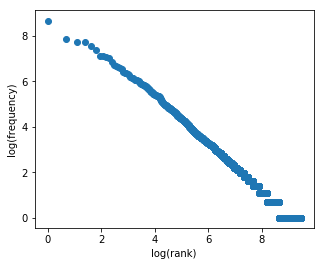

In [6]:
import math
x = []
y = []
X_LABEL = "log(rank)"
Y_LABEL = "log(frequency)"

# implement me! you should fill the x and y arrays. Add your code here

wc_data = word_counts.items()
wc_data.sort(key=lambda (w,c): -c)

x = [math.log(i) for i in range(1, len(wc_data)+1)]
y = [math.log(i[1]) for i in wc_data]

plt.scatter(x, y)
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

**Question 1.5 (5 points)**

You should see some discountinuities on the left and right sides of this figure.  Why are we seeing them on the left?  Why are we seeing them on the right?  On the right, what are those "ledges"?

The ones on the left represent the handful of highest-ranked, most-frequent tokens. They don't line up nicely on a log-log plot because their frequencies are much, much larger than those of the mid-ranked tokens (the body of the line). The ones on the right represent the very large number of tokens that all have a low frequency: the last three ledges, for example, are the plots of tokens that have frequencies 3, 2, 1 respectively.

## Part Two: Naive Bayes

This section of the homework will walk you through coding a Naive Bayes classifier that can distinguish between postive and negative reviews (at some level of accuracy).

**Question 2.1 (5 pts) ** To start, implement the `update_model` function in `hw_1.py`. Make sure to read the function comments so you know what to update. Also review the NaiveBayes class variables in the `def __init__` method of the NaiveBayes class  to get a sense of which statistics are important to keep track of. Once you have implemented `update_model`, run the train model function using the code below. You’ll need to provide the path to the dataset you downloaded to run the code.

In [11]:
nb = NaiveBayes(PATH_TO_DATA, tokenizer=tokenize_doc)
nb.train_model()

if len(nb.vocab) == 252165:
    print "Great! The vocabulary size is {}".format(252165)
else:
    print "Oh no! Something seems off. Double check your code before continuing. Maybe a mistake in update_model?"

REPORTING CORPUS STATISTICS
NUMBER OF DOCUMENTS IN POSITIVE CLASS: 600.0
NUMBER OF DOCUMENTS IN NEGATIVE CLASS: 644.0
NUMBER OF TOKENS IN POSITIVE CLASS: 36159.0
NUMBER OF TOKENS IN NEGATIVE CLASS: 37670.0
VOCABULARY SIZE: NUMBER OF UNIQUE WORDTYPES IN TRAINING CORPUS: 9295
Oh no! Something seems off. Double check your code before continuing. Maybe a mistake in update_model?


#### Exploratory analysis

Let’s begin to explore the count statistics stored by the update model function. Use the provided `top_n` function to find the top 10 most common words in the positive class and top 10 most common words in the negative class. You don't have to code anything to do this.

In [13]:
from NaiveBayes import *
import pickle

functional_words = ['the', 'a', 'to', 'of', 'in', 'but', 'me', 'her', 'his', 'on', 'if', 'no', 'one','i', 'he', 'she', 'we', 'it', 'you', 'they', '\'', 'will', 'may', 'might', 'must', 'am', 'is',
                    'are', 'was', 'were', 'be', 'being', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'shall',
                    'will', 'should', 'would', 'can', 'could', 'and', 'for', 'as', 'that', 'my', 'this', 'when', 
                    'who', 'with', 'by', 'so', 'at', 'or', 'yet', 'from', 'like', 'upon', 'all', 'how', 'thee','our','what'
                    'nor', 'unto', 'still', 'too', 'its', 'there', 'then', 'now', 'yet', 'not', 'an', 'some', 'other']

set_p = set()
set_n = set()

# print "TOP 100 WORDS FOR CLASS " + POS_LABEL + ":"
for tok, count in nb.all_n(POS_LABEL):
    if tok not in functional_words:
        set_p.add(tok)
#         print '', tok, count
print ''

# print "TOP 100 WORDS FOR CLASS " + NEG_LABEL + ":"
for tok, count in nb.all_n(NEG_LABEL):
    if tok not in functional_words:
        set_n.add(tok)
#         print '', tok, count

pos_set = set_p.difference(set_n)
neg_set = set_n.difference(set_p)

with open("pos_seeds_NB.pickle", 'wb') as f:
    pickle.dump(pos_set, f)

with open("neg_seeds_NB.pickle", 'wb') as f:
    pickle.dump(neg_set, f)
    
with open("pos_seeds_NB.pickle", 'rb') as f:
    pos_set = pickle.load(f)

with open("neg_seeds_NB.pickle", 'rb') as f:
    neg_set = pickle.load(f)

print(len(pos_set))
print('Pos Seeds:')
print(pos_set)
print(len(neg_set))
print('Neg Seeds:')
print(neg_set)
print ''


2995
Pos Seeds:
set(['limited', 'clamoring', 'pardon', 'powders', 'blisters', 'dynasty', 'astray', 'mirage', 'oldest', 'hate', 'bestowing', 'consolidates', 'marching', 'canes', 'clasps', 'patches', 'paris', 'tippler', 'whoso', 'himmaleh', 'painters', 'unroll', 'trousers', 'dukes', 'sway', 'admirations', 'ordnance', 'ale', 'cruising', 'compassion', 'destitution', 'merchantmen', "firmament's", "outcast's", 'attireth', 'caput', 'reforms', 'jacob', 'refrains', 'bravest', 'scholar', 'holiness', 'buttonhole', 'laurels', 'conceive', 'wending', 'harriet', 'landlords', 'faintest', 'lustre', 'stiffens', 'elegant', 'crave', 'inheritors', 'charted', 'guillotine', 'sterile', 'meekly', 'captain', 'deliberate', 'gambols', 'supplied', 'lights', 'unreality', 'dangles', 'glaciers', 'endorse', 'ebbs', 'numeral', 'cockade', 'eves', 'mints', 'crouch', 'screams', 'reporter', 'blesseder', 'leaning', 'usurps', 'reported', 'protection', 'pursuit', 'path', 'confronts', 'watchers', 'settler', 'settles', 'culmin

**Question 2.2 (5 points)**

Will the top 10 words of the positive/negative classes help discriminate between the two classes? Do you imagine that processing other English text will result in a similar phenomenon?

No way, since the most frequent words in English (and, probably, all human languages) have affectively neutral syntactic functions; they constitute the logical architecture of an utterance into which affective content can be embedded. For example: "I am going to X" only has one element, X, that can carry affect ("scream," "laugh," "faint," "die," "sleep," etc.), while the rest of the words merely generate situational context for that affect. Processing other English text will almost certainly lead to the same phenomenon.

**Question 2.3 (5 pts) **

The Naive Bayes model assumes that all features are conditionally independent given the class label. For our purposes, this means that the probability of seeing a particular word in a document with class label $y$ is independent of the rest of the words in that document. Implement the `p_word_given_label` function. This function calculates P (w|y) (i.e., the probability of seeing word w in a document given the label of that document is y).

Use your `p_word_given_label` function to compute the probability of seeing the word “fantastic” given each sentiment label. Repeat the computation for the word “boring.” 

In [15]:
print "P('fantastic'|pos):",  nb.p_word_given_label("fantastic", POS_LABEL)
print "P('fantastic'|neg):",  nb.p_word_given_label("fantastic", NEG_LABEL)
print "P('boring'|pos):",  nb.p_word_given_label("boring", POS_LABEL)
print "P('boring'|neg):",  nb.p_word_given_label("boring", NEG_LABEL)

P('fantastic'|pos): 0.000154458162793
P('fantastic'|neg): 3.77720191813e-05
P('boring'|pos): 6.18508616873e-05
P('boring'|neg): 0.000287275265149


Which word has a higher probability given the positive class, fantastic or boring? Which word has a higher probability given the negative class? Is this what you would expect?

"Fantastic" and "boring" have higher probabilities given positive and negative classes, respectively. Yes, definitely what would I expect, since ironic usage of these words, which would invert their affect, will be far less frequent than their customary usage in a given corpus of sufficient size.

**Question 2.4 (5 pts)**

In the next cell, compute the probability of the word "car-thievery" in the positive training data and negative training data.

In [16]:
print "P('car-thievery'|pos):",  nb.p_word_given_label("car-thievery", POS_LABEL)
print "P('car-thievery'|neg):",  nb.p_word_given_label("car-thievery", NEG_LABEL)

P('car-thievery'|pos): 3.3798285075e-07
P('car-thievery'|neg): 0.0


What do you notice about "P('car-thievery'|neg)"? Why do you see this number? What would happen if we took the log of "P('car-thievery'|neg)"? What would happen if we multiplied "P('car-thievery'|neg)" by "P('cliche'|neg)"? Why might these operations cause problems for a Naive Bayes classifier?

P('car-thievery'|neg) is 0 because the token must not occur in the negative class. If we took a log of 0, the heavens would split asunder, mass hysteria, dogs and cats sleeping together, etc. Multiplying any other P by 0 would yield 0, giving us no information about the corpus; it would render a Naive Bayes classifier useless because we assume conditional independence of features and so will eventually want to multiply probabilities together.

**Question 2.5 (5 pts)**

We can address the issues from question 2.4 with psuedocounts. A psuedocount is a fixed amount added to the count of each word stored in our model. Psuedocounts are used to help smooth calculations involving words for which there is little data. Implement
`p_word_given_label_and_psuedocount` and then run the next cell. Hint: look at the slides from the lecture on pseudocounts.

In [17]:
print "P('car-thievery'|neg):",  nb.p_word_given_label_and_pseudocount("car-thievery", NEG_LABEL, 1.0)

P('car-thievery'|neg): 3.46532045897e-07


**Question 2.6 (getting ready for question 2.10)**

*Prior and Likelihood* 

As noted before, the Naive Bayes model assumes that all words in a document are independent of one another given the document’s label. Because of this we can write the likelihood of a document as:

$P(w_{d1},\cdots,w_{dn}|y_d) = \prod_{i=1}^{n}P(w_{di}|y_d)$

However, if a document has a lot of words, the likelihood will become extremely small and we’ll encounter numerical underflow. Underflow is a common problem when dealing with prob- abilistic models; if you are unfamiliar with it, you can get a brief overview on [Wikipedia](https:/en.wikipedia.org/wiki/Arithmetic_underflow). To deal with underflow, a common transformation is to work in log-space.

$\log[P(w_{d1},\cdots,w_{dn}|y_d)] = \sum_{i=1}^{n}\log[P(w_{di}|y_d)]$

Implement the `log_likelihood` function (Hint: it should make calls to the p word given label and psuedocount function).
Implement the `log_prior` function. This function takes a class label and returns the log of the fraction of the training documents that are of that label.

There is nothing to print out for this question. But you will use these functions in a moment...

**Question 2.7 (5 pts) **

Naive Bayes is a model that tells us how to compute the posterior
probability of a document being of some label (i.e.,
$P(y_d|\mathbf{w_d})$).  Specifically, we do so using bayes rule:

  $P(y_d|\mathbf{w_d}) = \frac{P(y_d)P(\mathbf{w_d}|y_d)}{P(\mathbf{w_d})}$

In the previous section you implemented functions to compute both
the log prior ($\log[P(y_d)]$) and the log likelihood
($\log[P( \mathbf{w_d} |y_d)]$ ). Now, all your missing is the
*normalizer*, $P(\mathbf{w_d})$.

Derive the normalizer by expanding $P(\mathbf{w_d})$. You will have to use "MathJax" to write out the equations. MathJax is very similar to LaTeX. 99% of the MathJax you will need to write for this course (and others at U Mass) is included in the first answer of [this](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) tutorial. MathJax and LaTeX can be annoying first, but once you get a little practice, using these tools will feel like second nature.


$P(\mathbf{w_d}) = P(\mathbf{w_d}|y_d)P(y_d) + P(\mathbf{w_d}|\sim{y_d})P(\sim{y_d})$

**Question 2.8 (5 pts)**

One way to classify a document is to compute the unnormalized log posterior for both labels and take the argmax (i.e., the label that yields the higher unnormalized log posterior). The unnormalized log posterior is the sum of the log prior and the log likelihood of the document. Why don’t we need to compute the log normalizer here?

Since we're using argmax and evaluating a number of log posteriors (here, just two), and every log posterior has the same denominator (the log normalizer), we can ignore the log normalizer. Doing so will preserve proportionality among the log posteriors since we're effectively multiplying all of them by the common denominator.

**Question 2.9 (15 pts)**

Implement the `unnormalized_log_posterior` function and the `classify` function. The `classify` function should use the unnormalized log posteriors but should not compute the normalizer. Once you implement the `classify` function, we'd like to evaluate its accuracy. `evaluate_classifier_accuracy` is implemented for you so you don't need to change that method.

In [9]:
print nb.evaluate_classifier_accuracy(1.0)

58.5687382298


**Question 2.10 (5 pts)**

Try evaluating your model again with a pseudocount parameter of 500.

In [10]:
print nb.evaluate_classifier_accuracy(500.0)

48.2109227872


Does the accuracy go up or down when the pseudo count parameter is raised to 500? Why do you think this is?

It goes down because as the pseudocount parameter (alpha) approaches infinity, it eclipses out the actual word counts in the corpus, which are comparatively tiny. I got it to hit 50% with an alpha of just over 5000.

**Question 2.11 (5 pts)**

Our trained model can be queried to do exploratory data analysis. We
saw that the top 10 most common words for each class were not very
discriminative. Often times, a more descriminative statistic is a
word's likelihood ratio. A word's likelihood ratio is defined as

$LR(w)=\frac{P(w|y=\mathrm{pos})}{P(w|y=\mathrm{neg})}$

A word with $LR=5$ is five times more likely to appear in a positive
review than it is in a negative review; a word with $LR=0.33$ is one
third as likely to appear in a positive review than a negative review

In [20]:
# Implement the nb.likelihod_ratio function and use it to investigate the likelihood ratio of "fantastic" and "boring"
print "LIKEHOOD RATIO OF 'fantastic':", nb.likelihood_ratio('fantastic', 1.0)
print "LIKEHOOD RATIO OF 'boring':", nb.likelihood_ratio('boring', 1.0)
print "LIKEHOOD RATIO OF 'the':", nb.likelihood_ratio('the', 1.0)
print "LIKEHOOD RATIO OF 'to':", nb.likelihood_ratio('to', 1.0)


LIKEHOOD RATIO OF 'fantastic': 4.06091371082
LIKEHOOD RATIO OF 'boring': 0.216217429124
LIKEHOOD RATIO OF 'the': 1.03406562348
LIKEHOOD RATIO OF 'to': 0.943418253584


Does it make sense that $LR$('fantastic') $>$ $LR$('to')? 

Yes, because it is a word with an inherent positive affect, used primarily in contexts where a speaker is indicating great satisfaction, surprised happiness, joy, etc. in response to the subject. "To" is structural rather than affective, so its $LR$ should be close to 1.

** Question 2.12 (15 pts)** 

Find a review that your classifier got wrong. 

In [22]:
# in this cell, print out a review that your classifier got wrong. Print out the text of the review along with the label
for label in [POS_LABEL]:
    for directory in [TEST_DIR]:
        for fn in glob.glob(directory + "/" + label + "/*txt"):
            file = open(fn)
            doc = tokenize_doc(file.read())
            res = nb.classify(doc, 1)
            if res == NEG_LABEL:
                print "FN:", fn
                print "In /test/pos, but label is:", res, "\n"
                file.seek(0)
                out = file.readlines()
                for w in out:
                    print w
                break
            file.close()
        else:
            continue
        break


FN: /home/tck/PycharmProjects/CS585HW1/large_movie_review_dataset/test/pos/11646_8.txt
In /test/pos, but label is: neg 

Just to clarify, Matthew Poncelet wasn't a real person, but a character combination of 2 killers who were BOTH convicted and sentenced to die for a murder of two teenagers.<br /><br />I read the User Comments and they react as if Matthew was real. The character is based on a mixture of two killers, Elmo Patrick Sonnier and Robert Lee Willie (who murdered separate people) and the murder itself was based on the one Willie committed. The conflict of both Willie having someone else present and both parties swearing the other did the killing is worked into the story as well.<br /><br />Prejean's approach is unique in that she not only is ministering to the convicts as they wait for their death and aiding them in taking responsibility for their actions, she also reaches out to the victims' families, to help them know that the convict did, indeed feel remorse for what they 

What are two reasons your system might have misclassified this example? What improvements could you make that may help your system classify this example correctly? 

#1: The affect of the diction is overwhelmingly negative when considered simply as a bag of words: lots of "kill," "death," "murder," "punish," "victim," etc. But the writer is clearly very engaged with the world of the film and has written about the film in such detail in order to defend the quality of its characterizations; hence, it's an implicitly positive review. At present, the classifier is just dumbly (naively?) building its pos/neg model on the frequency of word counts on labeled texts in the training set. It's incapable of detecting subtleties introduced at the compositional level. To improve this, another function might be written that checks for the presence of compositional tokens typically used to indicate approval discursively (for example, "I find it fittingly ironic" or "point comes through very well" or "has my respect": all of these indicate the writer's approval of how the film handled its material). The presence of these tokens could be included as weights in the $LR$. This is probably one of the simpler ways to introduce some compositional analysis, but such a function would be brittle, relying on a predetermined list of tokens selected by an expert. It would lack generalizability and add a considerable amount of computational complexity.

#2. There are a considerable number of "not" and "-n't"s in this review. Out of curiosity, I generated $LR$s for both: "not" = 0.862887136273 and "n't" = 0.487664310252, so it seems "n't" is more strongly correlated with a negative review, but "not" is fairly close to parity. Perhaps excluding "not" from the $LR$ calculation would help; after all, "not" doesn't have an inherent affect, but serves a logical function, especially in informal double negatives in English: "I'm not not happy with this film" and "I'm not unhappy with this film" are both expressions of mild approval, but treating "not" as an inherently negative term would swing both statements toward a negative misclassification.

#3. Expand the training set to include more nuanced reviews like this; that will inform the model that just because kill, kill, kill shows up in a review, it's not necessarily negative. This might have minimal effect unless a much larger body of nuanced texts were introduced into the labeled training set.

**Extra credit (up to 10 points) **

If you don't want to do the extra credit, you can stop here! Otherwise... keep reading... 
 
In this assignment, we use whitespace tokenization to create a bag-of-unigrams representation for the movie reviews. It is possible to improve this represetation to improve your classifier's performance. Use your own code or an external library such as nltk to perform tokenization, text normalization, word filtering, etc. Fill out your work in `def tokenize_doc_and_more` (below) and then show improvement by running the following.

`nb = NaiveBayes(PATH_TO_DATA, tokenizer=tokenize_doc_and_more)
nb.train_model()
nb.evaluate_classifier_accuracy(1.0)
`

Roughly speaking, the larger performance improvement, the more extra credit. However, doing a good job investigating, explaining and justifying your work with small experiments and comments is also extremely important. Make sure to describe what you did and analyze why your method works. Use this ipython notebook to show your work.

In [13]:
def tokenize_doc_and_more(doc):
    """
    Return some representation of a document.
    At a minimum, you need to perform tokenization, the rest is up to you.
    """
    # Implement me!
    
    import nltk, re, pprint
    from nltk.tokenize import RegexpTokenizer
    
#     doc = doc.replace('<', ' <')
#     doc = doc.replace('>', '> ')
    doc = doc.replace('n\'t', ' n\'t')
#     doc = doc.replace('<br />', ' ')
    doc = doc.replace('!', ' ! ')
    doc = doc.replace('?', ' ? ')

    bow = defaultdict(float)
    tokens = doc.split()
    lowered_tokens = map(lambda t: t.lower(), tokens)
    
    common_set = ['the', 'of', 'and', 'a', 'to',
                  'is']
    
    for token in lowered_tokens:
        bow[token] += 1.0
    
    # remove whatever's after "not"?
    # your code goes here
    for w in common_set:
        if w in bow:
            del bow[w]
    
    return bow

In [14]:
nb = NaiveBayes(PATH_TO_DATA, tokenizer=tokenize_doc_and_more)
nb.train_model()
nb.evaluate_classifier_accuracy(2.4)

REPORTING CORPUS STATISTICS
NUMBER OF DOCUMENTS IN POSITIVE CLASS: 600.0
NUMBER OF DOCUMENTS IN NEGATIVE CLASS: 644.0
NUMBER OF TOKENS IN POSITIVE CLASS: 30531.0
NUMBER OF TOKENS IN NEGATIVE CLASS: 32249.0
VOCABULARY SIZE: NUMBER OF UNIQUE WORDTYPES IN TRAINING CORPUS: 10527


58.568738229755176

Use cells at the bottom of this notebook to explain what you did in `better_tokenize_doc`. Include any experiments or explanations that you used to decide what goes in your function. 

At first, I tried a noise-cleaning approach, filtering out the top identical terms in each set, most of which don't carry any inherent positive or negative affect. But after an initial boost, the accuracy started to decline as the set of top common terms increased. I abandoned this approach after about the top-60 common words, except for filtering for the top five or six words.

Then I fiddled with removing the annoying HTML "br /" tags, since I could see from looking at some sample texts that they were joining random words together into big and often unique tokens that didn't carry any inherent information about the positivity of a review. Sadly, removing them only reduced accuracy! The grammar fiend in me was irked until I considered that the number of paragraphs a reviewer types in might have some relation to their emotional state while they write; perhaps the "br /" tags do carry some implicit emotional feature, then.

Spurred by this thought, I tried breaking off "n't" as an independent token; perhaps a person writing a negative review might be more likely to use this negation? The word counts for "n't" in the positive and negative sets are 13,114 and 19,364 respectively, a difference of 67% and surely a good $LR$ indicator. Adding this as a separate token did improve accuracy.

Then I thought to try exclamation marks and question marks as independent tokens; they carry emotional content in this kind of text. Counting them separately also helped boost accuracy.

Finally, I fiddled with alpha and found that it made a small but noticeable difference, but only when increased. An alpha of 2.4 produced the best result with the other changes.

For all that, I only improved accuracy by .888%. This was an interesting problem to play with -- I think I spent more time on it than on the rest of the homework combined -- but I can see that it's more complicated than I assumed at first. Perhaps improving the tokenizer will only take one so far when using a NB model.